In [39]:
import pandas as pd

df = pd.read_csv('./housing.data.txt', header=None, sep=r'\s+')
with open('columns.txt', 'r') as f:
    columns = [col.strip() for col in f]
df.columns = columns 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


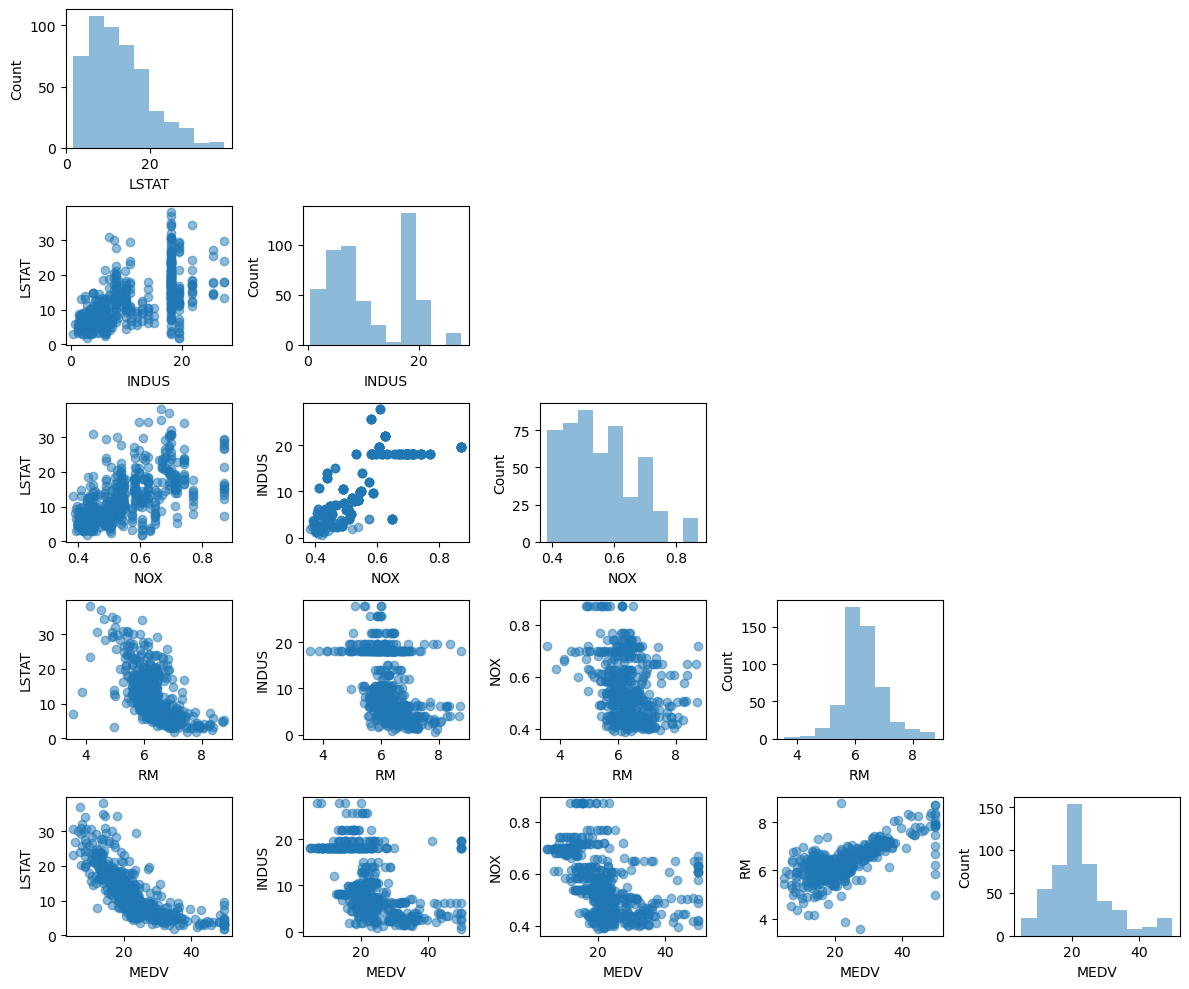

In [40]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
vals = df[cols].values
scatterplotmatrix(vals, figsize=(12, 10), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

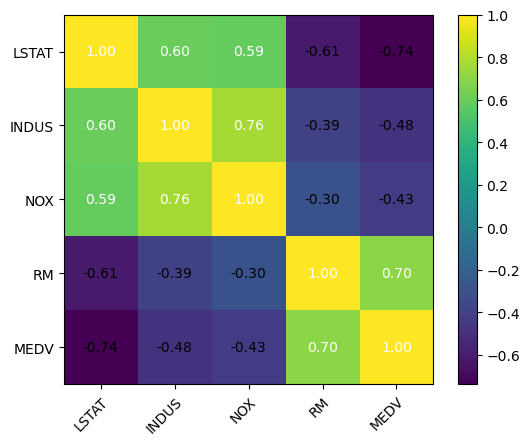

In [41]:
from mlxtend.plotting import heatmap
import numpy as np

corr_matr = np.corrcoef(df[cols].values.T)
hm = heatmap(corr_matr, row_names=cols, column_names=cols)
plt.show()

In [58]:
class LinearRegressionGD:
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = None
        self.cost_ = None
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)


In [59]:
from sklearn.preprocessing import StandardScaler
X = df[['RM']].values
y = df['MEDV'].values
std_scaler_x = StandardScaler()
std_scaler_y = StandardScaler()
X_std = std_scaler_x.fit_transform(X)
y_std = std_scaler_y.fit_transform(y[:, np.newaxis]).flatten()

lin_reg = LinearRegressionGD()
lin_reg.fit(X_std, y_std)

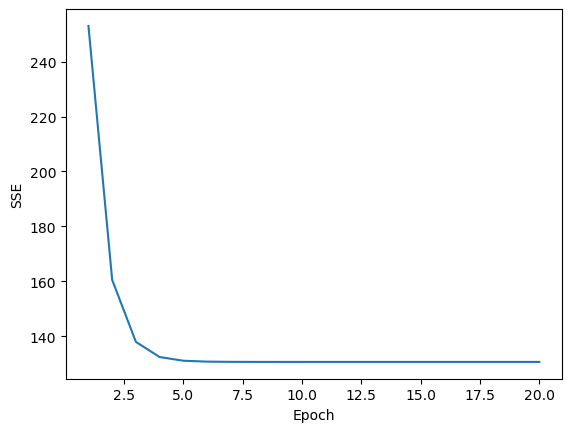

In [61]:
plt.plot(range(1, lin_reg.n_iter+1), lin_reg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [62]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

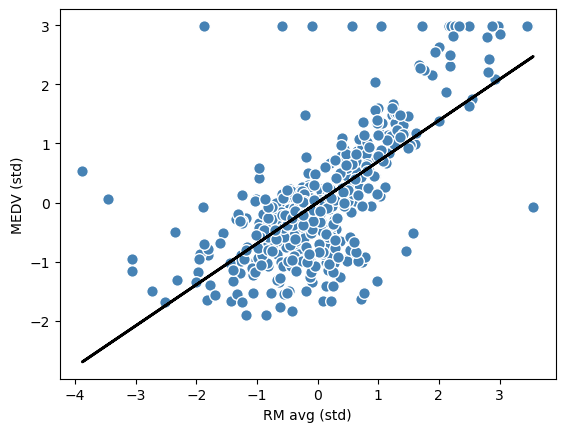

In [63]:
lin_regplot(X_std, y_std, lin_reg)
plt.xlabel('RM avg (std)')
plt.ylabel('MEDV (std)') 
plt.show()

In [75]:
num_rooms_std = std_scaler_x.transform(np.array([[5.0]]))
price_std = lin_reg.predict(num_rooms_std)
price = std_scaler_y.inverse_transform(price_std[:, np.newaxis])[0][0]
price

10.839932888584524

In [77]:
print('slope:', lin_reg.w_[1])
print('intersection 0y point:', lin_reg.w_[0])

slope: 0.6953594261783849
intersection 0y point: -4.831690603168682e-16
